Training for OR gate with Sigmoid...


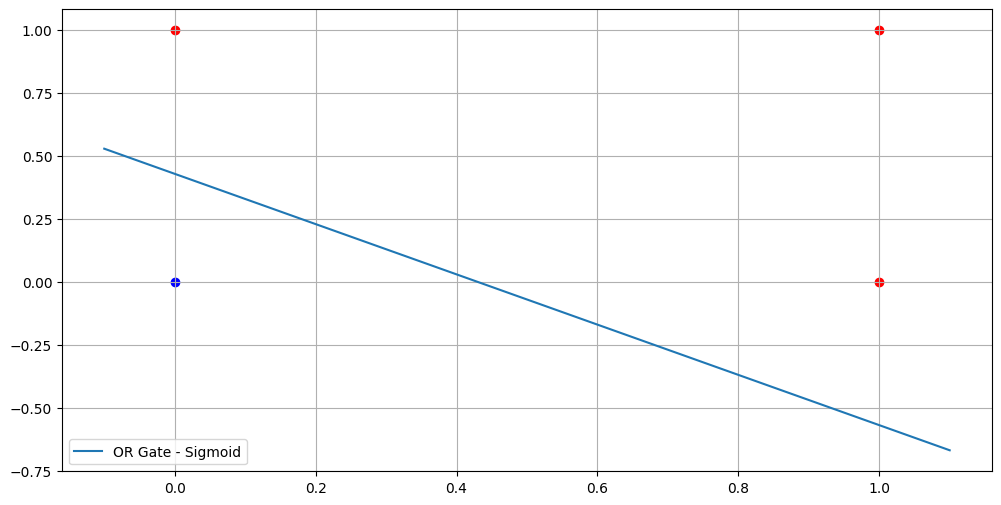

Training for AND gate with Sigmoid...


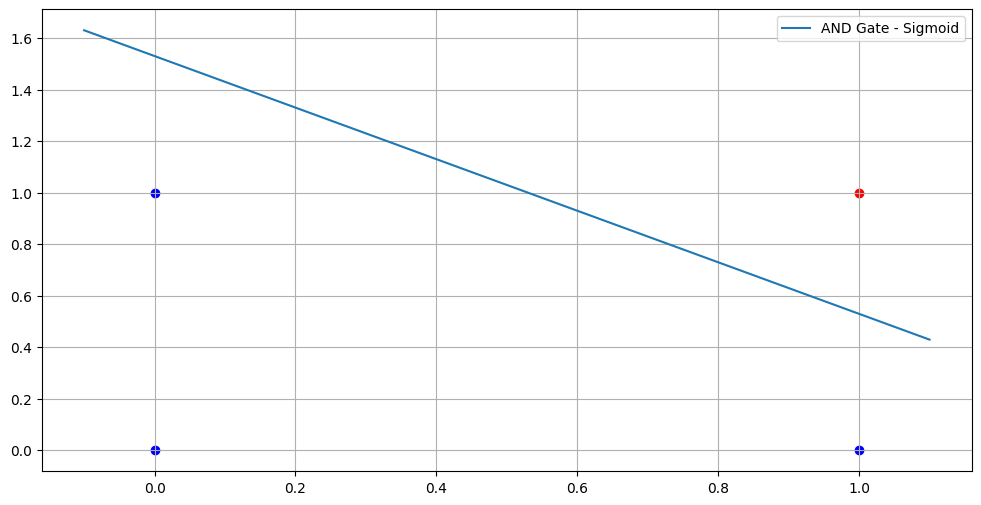

Training for NAND gate with Sigmoid...


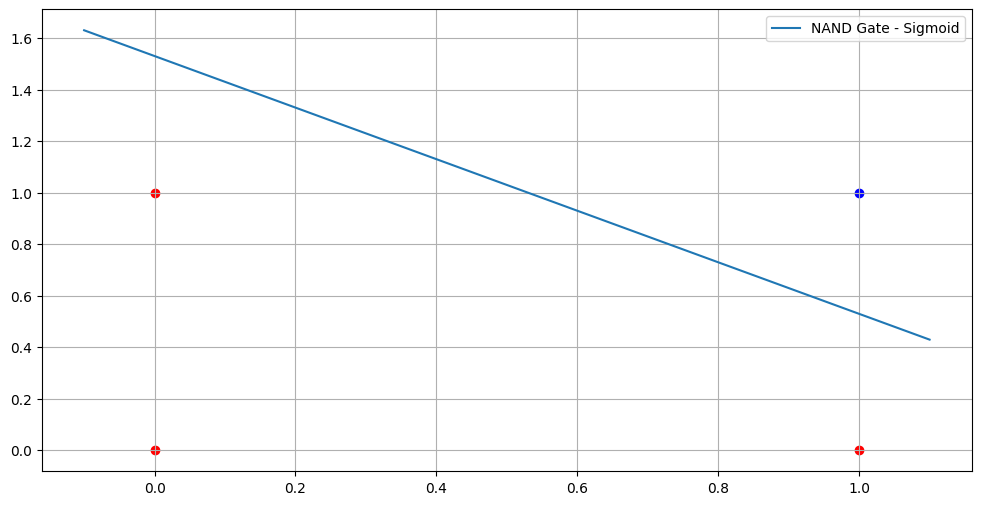

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(inputs, outputs, activation, learning_rate=0.1, max_iterations=1000):
    np.random.seed(42)
    weights = np.random.rand(2)
    bias = np.random.rand(1)
    
    for _ in range(max_iterations):
        for i in range(len(inputs)):
            linear_combination = np.dot(inputs[i], weights) + bias
            prediction = activation(linear_combination)
            error = outputs[i] - prediction
            weights += learning_rate * error * inputs[i]
            bias += learning_rate * error
    
    return weights, bias

def plot_decision_boundary(inputs, outputs, weights, bias, title):
    plt.figure(figsize=(12, 6))
    
    for i in range(len(inputs)):
        if outputs[i] == 0:
            plt.scatter(inputs[i][0], inputs[i][1], color='blue')
        else:
            plt.scatter(inputs[i][0], inputs[i][1], color='red')
    
    x_values = np.linspace(-0.1, 1.1, 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, label=title)
    plt.legend()
    plt.grid(True)
    plt.show()

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
gates = {
    "OR": np.array([0, 1, 1, 1]),
    "AND": np.array([0, 0, 0, 1]),
    "NAND": np.array([1, 1, 1, 0])
}

for gate, outputs in gates.items():
    # print(f"Training for {gate} gate with ReLU...")
    # weights, bias = train_perceptron(inputs, outputs, relu)
    # plot_decision_boundary(inputs, outputs, weights, bias, f"{gate} Gate - ReLU")
    
    print(f"Training for {gate} gate with Sigmoid...")
    weights, bias = train_perceptron(inputs, outputs, sigmoid)
    plot_decision_boundary(inputs, outputs, weights, bias, f"{gate} Gate - Sigmoid")


